<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DavRo24/blob/main/Proyecto_Final/Proyecto_Final_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Proyecto Final: Clasificación de Prendas de Vestir con Redes Neuronales Convolucionales (CNN) y uso de redes entrenadas (VGG16) para poder visualizar las activaciones de las capas convolucionales para una imagen específica
En este proyecto, implementaremos una red neuronal convolucional para clasificar prendas de vestir utilizando TensorFlow y Keras. Posteriormente, se trata de visualizar las activaciones de las capas convolucionales para una imagen específica usando una red Neuronal entrenada (VGG16).

David Romo Reyes

#Importación de librerías

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

#Ingresando a los documentos asociados en Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Cargando Red Neuronal

In [2]:
model = VGG16()

# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

553467096/553467096 [==============================] - 16s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Creando trabajo

1/1 [==============================] - 0s 74ms/step


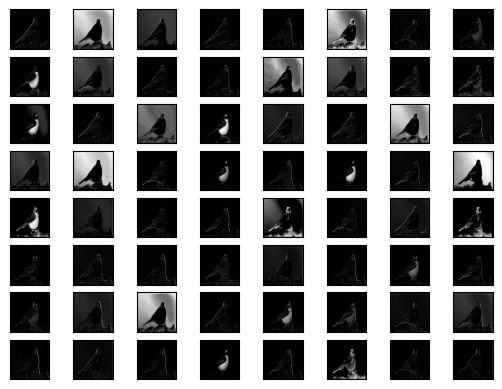

In [6]:
# Cargar la imagen con la forma requerida
path = '/content/drive/MyDrive/Machine-Learning-2023/Proyecto final/bird.jpg'
img = load_img(path, target_size=(224, 224))

# Convertir la imagen a un array
img_array = img_to_array(img)

# Expandir dimensiones para representar una sola 'muestra'
img_array = expand_dims(img_array, axis=0)

# Preparar la imagen (por ejemplo, escalar los valores de píxeles para VGG)
img_array = preprocess_input(img_array)

# Obtener el mapa de características para la primera capa oculta
feature_maps = model.predict(img_array)

# Plotear todos los mapas en una cuadrícula de 8x8
cuadrado = 8
ix = 1
for _ in range(cuadrado):
    for _ in range(cuadrado):
        # Especificar el subplot y desactivar los ejes
        ax = pyplot.subplot(cuadrado, cuadrado, ix)
        ax.set_xticks([])
        ax.set_yticks([])

        # Plotear el canal del filtro en escala de grises
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1

# Mostrar la figura
pyplot.show()

#Usando Red CNN para identificación de prendas, cargando data

In [9]:
# Cargar el conjunto de datos Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [10]:
# Normalizar y remodelar las imágenes
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Codificar las etiquetas en one-hot vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
# Definir la arquitectura de la red neuronal convolucional
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 clases en Fashion MNIST

In [12]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluar el modelo con el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy on test data: {test_acc}')

# Guardar el modelo entrenado para su uso futuro
model.save('fashion_mnist_cnn_model.h5')

Epoch 1/10
750/750 [==============================] - 64s 84ms/step - loss: 0.5736 - accuracy: 0.7889 - val_loss: 0.4037 - val_accuracy: 0.8497
Epoch 2/10
750/750 [==============================] - 55s 73ms/step - loss: 0.3613 - accuracy: 0.8680 - val_loss: 0.3353 - val_accuracy: 0.8808
Epoch 3/10
750/750 [==============================] - 56s 74ms/step - loss: 0.3093 - accuracy: 0.8873 - val_loss: 0.3177 - val_accuracy: 0.8842
Epoch 4/10
750/750 [==============================] - 61s 81ms/step - loss: 0.2760 - accuracy: 0.8994 - val_loss: 0.2806 - val_accuracy: 0.8979
Epoch 5/10
750/750 [==============================] - 60s 80ms/step - loss: 0.2510 - accuracy: 0.9080 - val_loss: 0.2751 - val_accuracy: 0.9007
Epoch 6/10
750/750 [==============================] - 61s 82ms/step - loss: 0.2328 - accuracy: 0.9153 - val_loss: 0.2849 - val_accuracy: 0.8953
Epoch 7/10
750/750 [==============================] - 58s 77ms/step - loss: 0.2139 - accuracy: 0.9213 - val_loss: 0.2685 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
